In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import PyQt5
import mne
import pickle

import numpy as np
import scipy
from scipy.cluster.vq import kmeans as kmeans
import scipy.stats as stats

In [2]:
edf_struct = {}

#---------------------------------------------------------------------------#
edf_struct[0] = {}
edf_struct[0]['subject'] = 0
edf_struct[0]['filename']='/Volumes/Elements/normaliser_edf_data/14_04_16.edf'
edf_struct[0]['start']=142000
edf_struct[0]['end']=350000
edf_struct[0]['ttl']=120
edf_struct[0]['session']=0

edf_struct[1] = {}
edf_struct[1]['subject'] = 0
edf_struct[1]['filename']='/Volumes/Elements/normaliser_edf_data/18_04_16.edf'
edf_struct[1]['start']=350000
edf_struct[1]['end']=560000
edf_struct[1]['ttl']=120
edf_struct[1]['session']=1

edf_struct[2] = {}
edf_struct[2]['subject'] = 0
edf_struct[2]['filename']='/Volumes/Elements/normaliser_edf_data/20_04_16.edf'
edf_struct[2]['start']=955000#950000
edf_struct[2]['end']=1155000
edf_struct[2]['ttl']=120
edf_struct[2]['session']=2

#---------------------------------------------------------------------------#
edf_struct[3] = {}
edf_struct[3]['subject'] = 1
edf_struct[3]['filename']='/Volumes/Elements/normaliser_edf_data/030416.edf'
edf_struct[3]['start']=2305000#2300000
edf_struct[3]['end']=2520000
edf_struct[3]['ttl']=125
edf_struct[3]['session']=0

edf_struct[4] = {}
edf_struct[4]['subject'] = 1
edf_struct[4]['filename']='/Volumes/Elements/normaliser_edf_data/040416.edf'
edf_struct[4]['start']=50000
edf_struct[4]['end']=255000
edf_struct[4]['ttl']=125
edf_struct[4]['session']=1

#---------------------------------------------------------------------------#
edf_struct[5] = {}
edf_struct[5]['subject'] = 2
edf_struct[5]['filename']='/Volumes/Elements/normaliser_edf_data/eugeni_090716.edf'
edf_struct[5]['start']=151000
edf_struct[5]['end']=342000
edf_struct[5]['ttl']=123
edf_struct[5]['session']=0

edf_struct[6] = {}
edf_struct[6]['subject'] = 2
edf_struct[6]['filename']='/Volumes/Elements/normaliser_edf_data/eugeni_110716.edf'
edf_struct[6]['start']=153000
edf_struct[6]['end']=363000
edf_struct[6]['ttl']=123
edf_struct[6]['session']=1

edf_struct[7] = {}
edf_struct[7]['subject'] = 2
edf_struct[7]['filename']='/Volumes/Elements/normaliser_edf_data/eugeni_120716.edf'
edf_struct[7]['start']=40000
edf_struct[7]['end']=250000
edf_struct[7]['ttl']=123
edf_struct[7]['session']=2

#---------------------------------------------------------------------------#

edf_struct[8] = {}
edf_struct[8]['subject'] = 3
edf_struct[8]['filename']='/Volumes/Elements/normaliser_edf_data/Ines_250716.edf'
edf_struct[8]['start']=510000
edf_struct[8]['end']=730000
edf_struct[8]['ttl']=126
edf_struct[8]['session']=0

#---------------------------------------------------------------------------#
# here starts the ones with speed changes within the trial
#---------------------------------------------------------------------------#

edf_struct[9] = {}
edf_struct[9]['subject'] = 4
edf_struct[9]['filename']='/Volumes/Elements/normaliser_edf_data/200516.edf'
edf_struct[9]['start']=17008004
edf_struct[9]['end']=18031047
edf_struct[9]['ttl']=222
edf_struct[9]['session']=0

#---------------------------------------------------------------------------#

# edf_struct[12] = {}
# edf_struct[12]['subject'] = 6
# edf_struct[12]['filename']='/Volumes/Elements/normaliser_edf_data/200516.edf'
# edf_struct[12]['start']=17008004
# edf_struct[12]['end']=18031047
# edf_struct[12]['ttl']=222
# edf_struct[12]['session']=0



In [3]:
density = np.tile( np.repeat( np.arange(3), 3 ),3)
speed   = np.tile( np.arange(3), 9 )
dur     = np.tile( np.array([ 18.1, 13.5, 11]), 3).reshape(3,3).T
dd      = np.tile(np.array([50,100,150]),3).reshape(3,3)
K_i     = dd/dur
unii    = K_i[speed,density]
K_i_idx = (  np.tile(np.arange(3),3), np.repeat(np.arange(3),3)  )

In [4]:
study_info = {}
#  this dictionary will contain information regarding the data, channels and experimental markers

Extracting EDF parameters from /Volumes/Elements/normaliser_edf_data/14_04_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
27
Writing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_0_session_0_raw.fif
Closing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_0_session_0_raw.fif [done]


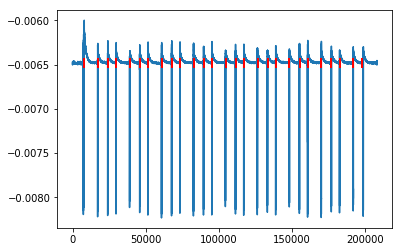

In [5]:
ii = 0

filename = edf_struct[ii]['filename']
raw = mne.io.read_raw_edf(filename, preload=False)


raw_data = raw.get_data(picks=[edf_struct[ii]['ttl']], start=edf_struct[ii]['start'] , stop=edf_struct[ii]['end'])
raw_data = raw_data[0]
raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)



idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 5 )[0]
idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
final_idx = np.copy(idx_ttl[idx_ttl_2])

if final_idx.size == 26:
    final_idx = np.append(final_idx , final_idx[-1]+np.min(np.diff(final_idx)))
    print(final_idx.size)

plt.plot( raw_data )
plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)

this_session_markers = np.vstack([final_idx, speed, density]).T



crop_tmin = edf_struct[ii]['start'] / raw.info['sfreq'] 
crop_tmax = edf_struct[ii]['end'] / raw.info['sfreq']
raw = raw.crop(tmin=crop_tmin, tmax=crop_tmax)

save_file_name = 'data_all/sub_'+str(edf_struct[ii]['subject'])+'_session_'+str(edf_struct[ii]['session'])+'_raw.fif'
raw.save(save_file_name)


tmp_hpc_channels_idx = []
tmp_hpc_channels_name = []
for cc in range(len(raw.info['ch_names'])):
    if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
        tmp_hpc_channels_idx.append(cc)
        tmp_hpc_channels_name.append(raw.info['ch_names'][cc])

        
study_info[ii] = {}
study_info[ii]['subject'] = edf_struct[ii]['subject']
study_info[ii]['session'] = edf_struct[ii]['session']
study_info[ii]['save_file_name'] = save_file_name
study_info[ii]['tmp_hpc_channels_idx'] = tmp_hpc_channels_idx
study_info[ii]['tmp_hpc_channels_name'] = tmp_hpc_channels_name
study_info[ii]['trial_markers'] = this_session_markers

Extracting EDF parameters from /Volumes/Elements/normaliser_edf_data/18_04_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
27
Writing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_0_session_1_raw.fif
Closing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_0_session_1_raw.fif [done]


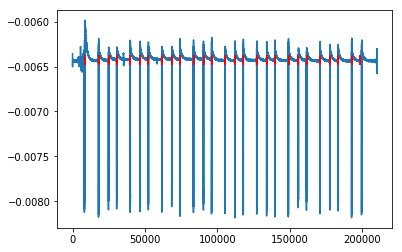

In [6]:
ii = 1

filename = edf_struct[ii]['filename']
raw = mne.io.read_raw_edf(filename, preload=False)


raw_data = raw.get_data(picks=[edf_struct[ii]['ttl']], start=edf_struct[ii]['start'] , stop=edf_struct[ii]['end'])
raw_data = raw_data[0]
raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)



idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 5 )[0]
idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
final_idx = np.copy(idx_ttl[idx_ttl_2])

if final_idx.size == 26:
    final_idx = np.append(final_idx , final_idx[-1]+np.min(np.diff(final_idx)))
    print(final_idx.size)

plt.plot( raw_data )
plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)

this_session_markers = np.vstack([final_idx, speed, density]).T



crop_tmin = edf_struct[ii]['start'] / raw.info['sfreq'] 
crop_tmax = edf_struct[ii]['end'] / raw.info['sfreq']
raw = raw.crop(tmin=crop_tmin, tmax=crop_tmax)

save_file_name = 'data_all/sub_'+str(edf_struct[ii]['subject'])+'_session_'+str(edf_struct[ii]['session'])+'_raw.fif'
raw.save(save_file_name)


tmp_hpc_channels_idx = []
tmp_hpc_channels_name = []
for cc in range(len(raw.info['ch_names'])):
    if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
        tmp_hpc_channels_idx.append(cc)
        tmp_hpc_channels_name.append(raw.info['ch_names'][cc])

        
study_info[ii] = {}
study_info[ii]['subject'] = edf_struct[ii]['subject']
study_info[ii]['session'] = edf_struct[ii]['session']
study_info[ii]['save_file_name'] = save_file_name
study_info[ii]['tmp_hpc_channels_idx'] = tmp_hpc_channels_idx
study_info[ii]['tmp_hpc_channels_name'] = tmp_hpc_channels_name
study_info[ii]['trial_markers'] = this_session_markers

Extracting EDF parameters from /Volumes/Elements/normaliser_edf_data/20_04_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
Writing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_0_session_2_raw.fif
Closing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_0_session_2_raw.fif [done]


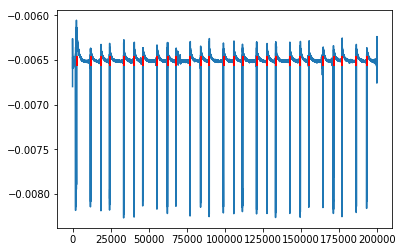

In [7]:
ii = 2

filename = edf_struct[ii]['filename']
raw = mne.io.read_raw_edf(filename, preload=False)


raw_data = raw.get_data(picks=[edf_struct[ii]['ttl']], start=edf_struct[ii]['start'] , stop=edf_struct[ii]['end'])
raw_data = raw_data[0]
raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)



idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 5 )[0]
idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
final_idx = np.copy(idx_ttl[idx_ttl_2])

if final_idx.size == 26:
    final_idx = np.append(final_idx , final_idx[-1]+np.min(np.diff(final_idx)))
    print(final_idx.size)

plt.plot( raw_data )
plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)

this_session_markers = np.vstack([final_idx, speed, density]).T



crop_tmin = edf_struct[ii]['start'] / raw.info['sfreq'] 
crop_tmax = edf_struct[ii]['end'] / raw.info['sfreq']
raw = raw.crop(tmin=crop_tmin, tmax=crop_tmax)

save_file_name = 'data_all/sub_'+str(edf_struct[ii]['subject'])+'_session_'+str(edf_struct[ii]['session'])+'_raw.fif'
raw.save(save_file_name)


tmp_hpc_channels_idx = []
tmp_hpc_channels_name = []
for cc in range(len(raw.info['ch_names'])):
    if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
        tmp_hpc_channels_idx.append(cc)
        tmp_hpc_channels_name.append(raw.info['ch_names'][cc])

        
study_info[ii] = {}
study_info[ii]['subject'] = edf_struct[ii]['subject']
study_info[ii]['session'] = edf_struct[ii]['session']
study_info[ii]['save_file_name'] = save_file_name
study_info[ii]['tmp_hpc_channels_idx'] = tmp_hpc_channels_idx
study_info[ii]['tmp_hpc_channels_name'] = tmp_hpc_channels_name
study_info[ii]['trial_markers'] = this_session_markers

Extracting EDF parameters from /Volumes/Elements/normaliser_edf_data/030416.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
27
Writing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_1_session_0_raw.fif
Closing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_1_session_0_raw.fif [done]


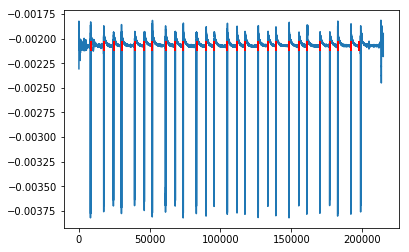

In [8]:
ii = 3

filename = edf_struct[ii]['filename']
raw = mne.io.read_raw_edf(filename, preload=False)


raw_data = raw.get_data(picks=[edf_struct[ii]['ttl']], start=edf_struct[ii]['start'] , stop=edf_struct[ii]['end'])
raw_data = raw_data[0]
raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)



idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 5 )[0]
idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
final_idx = np.copy(idx_ttl[idx_ttl_2])

if final_idx.size == 26:
    final_idx = np.append(final_idx , final_idx[-1]+np.min(np.diff(final_idx)))
    print(final_idx.size)

plt.plot( raw_data )
plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)

this_session_markers = np.vstack([final_idx, speed, density]).T



crop_tmin = edf_struct[ii]['start'] / raw.info['sfreq'] 
crop_tmax = edf_struct[ii]['end'] / raw.info['sfreq']
raw = raw.crop(tmin=crop_tmin, tmax=crop_tmax)

save_file_name = 'data_all/sub_'+str(edf_struct[ii]['subject'])+'_session_'+str(edf_struct[ii]['session'])+'_raw.fif'
raw.save(save_file_name)


tmp_hpc_channels_idx = []
tmp_hpc_channels_name = []
for cc in range(len(raw.info['ch_names'])):
    if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
        tmp_hpc_channels_idx.append(cc)
        tmp_hpc_channels_name.append(raw.info['ch_names'][cc])

        
study_info[ii] = {}
study_info[ii]['subject'] = edf_struct[ii]['subject']
study_info[ii]['session'] = edf_struct[ii]['session']
study_info[ii]['save_file_name'] = save_file_name
study_info[ii]['tmp_hpc_channels_idx'] = tmp_hpc_channels_idx
study_info[ii]['tmp_hpc_channels_name'] = tmp_hpc_channels_name
study_info[ii]['trial_markers'] = this_session_markers

Extracting EDF parameters from /Volumes/Elements/normaliser_edf_data/040416.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
27
Writing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_1_session_1_raw.fif
Closing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_1_session_1_raw.fif [done]


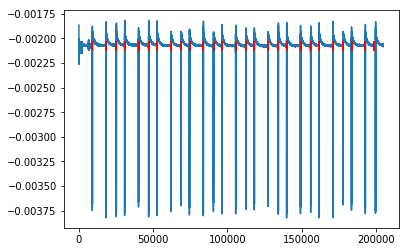

In [9]:
ii = 4

filename = edf_struct[ii]['filename']
raw = mne.io.read_raw_edf(filename, preload=False)


raw_data = raw.get_data(picks=[edf_struct[ii]['ttl']], start=edf_struct[ii]['start'] , stop=edf_struct[ii]['end'])
raw_data = raw_data[0]
raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)



idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 5 )[0]
idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
final_idx = np.copy(idx_ttl[idx_ttl_2])

if final_idx.size == 26:
    final_idx = np.append(final_idx , final_idx[-1]+np.min(np.diff(final_idx)))
    print(final_idx.size)

plt.plot( raw_data )
plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)

this_session_markers = np.vstack([final_idx, speed, density]).T



crop_tmin = edf_struct[ii]['start'] / raw.info['sfreq'] 
crop_tmax = edf_struct[ii]['end'] / raw.info['sfreq']
raw = raw.crop(tmin=crop_tmin, tmax=crop_tmax)

save_file_name = 'data_all/sub_'+str(edf_struct[ii]['subject'])+'_session_'+str(edf_struct[ii]['session'])+'_raw.fif'
raw.save(save_file_name)


tmp_hpc_channels_idx = []
tmp_hpc_channels_name = []
for cc in range(len(raw.info['ch_names'])):
    if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
        tmp_hpc_channels_idx.append(cc)
        tmp_hpc_channels_name.append(raw.info['ch_names'][cc])

        
study_info[ii] = {}
study_info[ii]['subject'] = edf_struct[ii]['subject']
study_info[ii]['session'] = edf_struct[ii]['session']
study_info[ii]['save_file_name'] = save_file_name
study_info[ii]['tmp_hpc_channels_idx'] = tmp_hpc_channels_idx
study_info[ii]['tmp_hpc_channels_name'] = tmp_hpc_channels_name
study_info[ii]['trial_markers'] = this_session_markers

Extracting EDF parameters from /Volumes/Elements/normaliser_edf_data/eugeni_110716.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
27
Writing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_2_session_1_raw.fif
Closing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_2_session_1_raw.fif [done]


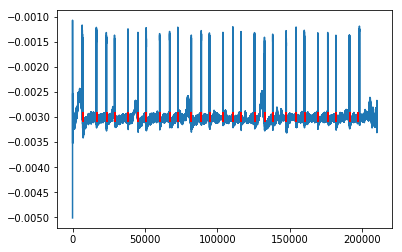

In [10]:
ii = 6

filename = edf_struct[ii]['filename']
raw = mne.io.read_raw_edf(filename, preload=False)


raw_data = raw.get_data(picks=[edf_struct[ii]['ttl']], start=edf_struct[ii]['start'] , stop=edf_struct[ii]['end'])
raw_data = raw_data[0]
raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)



idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 10 )[0]
idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
final_idx = np.copy(idx_ttl[idx_ttl_2])

final_idx = final_idx[1:]

if final_idx.size == 26:
    final_idx = np.append(final_idx , final_idx[-1]+np.min(np.diff(final_idx)))
    print(final_idx.size)

plt.plot( raw_data )
plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)

this_session_markers = np.vstack([final_idx, speed, density]).T



crop_tmin = edf_struct[ii]['start'] / raw.info['sfreq'] 
crop_tmax = edf_struct[ii]['end'] / raw.info['sfreq']
raw = raw.crop(tmin=crop_tmin, tmax=crop_tmax)

save_file_name = 'data_all/sub_'+str(edf_struct[ii]['subject'])+'_session_'+str(edf_struct[ii]['session'])+'_raw.fif'
raw.save(save_file_name)


tmp_hpc_channels_idx = []
tmp_hpc_channels_name = []
for cc in range(len(raw.info['ch_names'])):
    if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
        tmp_hpc_channels_idx.append(cc)
        tmp_hpc_channels_name.append(raw.info['ch_names'][cc])

        
study_info[ii] = {}
study_info[ii]['subject'] = edf_struct[ii]['subject']
study_info[ii]['session'] = edf_struct[ii]['session']
study_info[ii]['save_file_name'] = save_file_name
study_info[ii]['tmp_hpc_channels_idx'] = tmp_hpc_channels_idx
study_info[ii]['tmp_hpc_channels_name'] = tmp_hpc_channels_name
study_info[ii]['trial_markers'] = this_session_markers

Extracting EDF parameters from /Volumes/Elements/normaliser_edf_data/eugeni_120716.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
27
Writing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_2_session_2_raw.fif
Closing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_2_session_2_raw.fif [done]


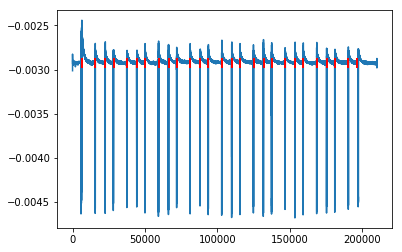

In [11]:
ii = 7

filename = edf_struct[ii]['filename']
raw = mne.io.read_raw_edf(filename, preload=False)


raw_data = raw.get_data(picks=[edf_struct[ii]['ttl']], start=edf_struct[ii]['start'] , stop=edf_struct[ii]['end'])
raw_data = raw_data[0]
raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)



idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 5 )[0]
idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
final_idx = np.copy(idx_ttl[idx_ttl_2])

if final_idx.size == 26:
    final_idx = np.append(final_idx , final_idx[-1]+np.min(np.diff(final_idx)))
    print(final_idx.size)

plt.plot( raw_data )
plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)

this_session_markers = np.vstack([final_idx, speed, density]).T



crop_tmin = edf_struct[ii]['start'] / raw.info['sfreq'] 
crop_tmax = edf_struct[ii]['end'] / raw.info['sfreq']
raw = raw.crop(tmin=crop_tmin, tmax=crop_tmax)

save_file_name = 'data_all/sub_'+str(edf_struct[ii]['subject'])+'_session_'+str(edf_struct[ii]['session'])+'_raw.fif'
raw.save(save_file_name)


tmp_hpc_channels_idx = []
tmp_hpc_channels_name = []
for cc in range(len(raw.info['ch_names'])):
    if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
        tmp_hpc_channels_idx.append(cc)
        tmp_hpc_channels_name.append(raw.info['ch_names'][cc])

        
study_info[ii] = {}
study_info[ii]['subject'] = edf_struct[ii]['subject']
study_info[ii]['session'] = edf_struct[ii]['session']
study_info[ii]['save_file_name'] = save_file_name
study_info[ii]['tmp_hpc_channels_idx'] = tmp_hpc_channels_idx
study_info[ii]['tmp_hpc_channels_name'] = tmp_hpc_channels_name
study_info[ii]['trial_markers'] = this_session_markers

Extracting EDF parameters from /Volumes/Elements/normaliser_edf_data/Ines_250716.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
27
Writing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_3_session_0_raw.fif
Closing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_3_session_0_raw.fif [done]


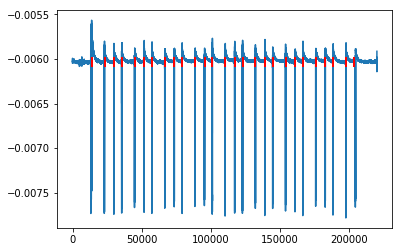

In [12]:
ii = 8

filename = edf_struct[ii]['filename']
raw = mne.io.read_raw_edf(filename, preload=False)


raw_data = raw.get_data(picks=[edf_struct[ii]['ttl']], start=edf_struct[ii]['start'] , stop=edf_struct[ii]['end'])
raw_data = raw_data[0]
raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)



idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 5 )[0]
idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
final_idx = np.copy(idx_ttl[idx_ttl_2])

if final_idx.size == 26:
    final_idx = np.append(final_idx , final_idx[-1]+np.min(np.diff(final_idx)))
    print(final_idx.size)

plt.plot( raw_data )
plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)

this_session_markers = np.vstack([final_idx, speed, density]).T



crop_tmin = edf_struct[ii]['start'] / raw.info['sfreq'] 
crop_tmax = edf_struct[ii]['end'] / raw.info['sfreq']
raw = raw.crop(tmin=crop_tmin, tmax=crop_tmax)

save_file_name = 'data_all/sub_'+str(edf_struct[ii]['subject'])+'_session_'+str(edf_struct[ii]['session'])+'_raw.fif'
raw.save(save_file_name)


tmp_hpc_channels_idx = []
tmp_hpc_channels_name = []
for cc in range(len(raw.info['ch_names'])):
    if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
        tmp_hpc_channels_idx.append(cc)
        tmp_hpc_channels_name.append(raw.info['ch_names'][cc])

        
study_info[ii] = {}
study_info[ii]['subject'] = edf_struct[ii]['subject']
study_info[ii]['session'] = edf_struct[ii]['session']
study_info[ii]['save_file_name'] = save_file_name
study_info[ii]['tmp_hpc_channels_idx'] = tmp_hpc_channels_idx
study_info[ii]['tmp_hpc_channels_name'] = tmp_hpc_channels_name
study_info[ii]['trial_markers'] = this_session_markers

# Here starts changes within the trial

Extracting EDF parameters from /Volumes/Elements/normaliser_edf_data/200516.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-stop filter
Filter length of 13517 samples (6.600 sec) selected
Writing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_4_session_0_raw.fif
Closing /Users/diogo/Desktop/Normaliser_2019/data_all/sub_4_session_0_raw.fif [done]


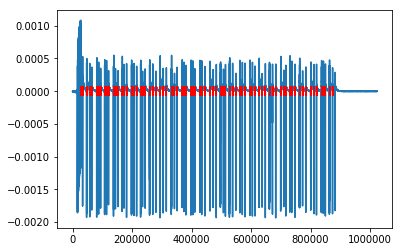

In [26]:
ii = 9

filename = edf_struct[ii]['filename']
raw = mne.io.read_raw_edf(filename, preload=False)


raw_data = raw.get_data(picks=[edf_struct[ii]['ttl']], start=edf_struct[ii]['start'] , stop=edf_struct[ii]['end'])
raw_data = raw_data[0]
raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)



idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 5 )[0]
idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
final_idx = np.copy(idx_ttl[idx_ttl_2])

plt.plot( raw_data )
plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)


experiment_log_file = '/Users/diogo/Documents/PHD/SPECS/HOSPITAL_STUDIES/theta_normalizer_changes_speed_within_trial/data/MariaDelMar_session_1_normalizerChangeSpeed_20052016.txt'
experiment_log = []
with open(experiment_log_file, 'r') as handle:
    for line in handle:        
        experiment_log.append(line)
        
        
        
stamps = []
for line in experiment_log[1:-1]:
    if line[0] == 'T': density = float(line.split(' ')[3])
    if line[:2] == ' C': 
        speed = float(line.split(' ')[4]    )
        stamps.append( [speed, density]  )
stamps = np.asanyarray(stamps)

stamps[:,0][stamps[:,0]==0.8] = 0
stamps[:,0][stamps[:,0]==1.0] = 1
stamps[:,0][stamps[:,0]==1.3] = 2

stamps[:,1][stamps[:,1]==50] = 0
stamps[:,1][stamps[:,1]==100] = 1
stamps[:,1][stamps[:,1]==150] = 2


stamps = stamps.astype(int)

stamps = stamps[1:-1]  ## for 20_05_2016

this_session_markers = np.hstack([ np.expand_dims(final_idx, axis=1), stamps  ])


crop_tmin = edf_struct[ii]['start'] / raw.info['sfreq'] 
crop_tmax = edf_struct[ii]['end'] / raw.info['sfreq']
raw = raw.crop(tmin=crop_tmin, tmax=crop_tmax)

save_file_name = 'data_all/sub_'+str(edf_struct[ii]['subject'])+'_session_'+str(edf_struct[ii]['session'])+'_raw.fif'
raw.save(save_file_name)


tmp_hpc_channels_idx = []
tmp_hpc_channels_name = []
for cc in range(len(raw.info['ch_names'])):
    if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
        tmp_hpc_channels_idx.append(cc)
        tmp_hpc_channels_name.append(raw.info['ch_names'][cc])

        
study_info[ii] = {}
study_info[ii]['subject'] = edf_struct[ii]['subject']
study_info[ii]['session'] = edf_struct[ii]['session']
study_info[ii]['save_file_name'] = save_file_name
study_info[ii]['tmp_hpc_channels_idx'] = tmp_hpc_channels_idx
study_info[ii]['tmp_hpc_channels_name'] = tmp_hpc_channels_name
study_info[ii]['trial_markers'] = this_session_markers




In [29]:
## Save study_info dictionary and redo the V2_analysis based on that

array([[  7292,      0,      0],
       [ 16580,      1,      0],
       [ 23445,      2,      0],
       [ 29096,      0,      1],
       [ 38404,      1,      1],
       [ 45271,      2,      1],
       [ 50923,      0,      2],
       [ 60221,      1,      2],
       [ 67097,      2,      2],
       [ 72756,      0,      0],
       [ 82048,      1,      0],
       [ 88915,      2,      0],
       [ 94572,      0,      1],
       [103873,      1,      1],
       [110749,      2,      1],
       [116399,      0,      2],
       [125699,      1,      2],
       [132566,      2,      2],
       [138225,      0,      0],
       [147524,      1,      0],
       [154391,      2,      0],
       [160042,      0,      1],
       [169351,      1,      1],
       [176211,      2,      1],
       [181858,      0,      2],
       [191152,      1,      2],
       [196799,      2,      2]])